
### Identifying Customer churn

One of the most common problems in business is identifying customer sentiment.

If a business owner can predict in advance that a customer will not return or will not reuse a product or service, they can take action to retain the customer and change their opinion.

In this project, we will predict whether customers of an online store will stay or leave by analyzing their data.

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import  confusion_matrix, classification_report, accuracy_score


In [100]:
url="https://github.com/anvarnarz/praktikum_datasets/blob/main/E-Commerce-Dataset.xlsx?raw=true"

df = pd.read_excel(url, sheet_name="E Comm")

df.head(10)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139.19
6,50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,120.86
7,50008,1,NaN,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,122.93
8,50009,1,13.0,Phone,3,9.0,E wallet,Male,NaN,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,126.83
9,50010,1,NaN,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,122.93


In [101]:
df['Churn'].value_counts()

,count
Churn,
0,4682
1,948


In [102]:
df.shape

(5630, 20)

In [103]:
description = pd.read_excel(url, sheet_name="Data Dict", header=1, usecols=[1,2,3])
description

,Data,Variable,Discerption
0,E Comm,CustomerID,Unique customer ID
1,E Comm,Churn,Churn Flag
2,E Comm,Tenure,Tenure of customer in organization
3,E Comm,PreferredLoginDevice,Preferred login device of customer
4,E Comm,CityTier,City tier
5,E Comm,WarehouseToHome,Distance in between warehouse to home of customer
6,E Comm,PreferredPaymentMode,Preferred payment method of customer
7,E Comm,Gender,Gender of customer
8,E Comm,HourSpendOnApp,Number of hours spend on mobile application or...
9,E Comm,NumberOfDeviceRegistered,Total number of deceives is registered on part...


## I analyze the data

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

Number of rows: 5,630

Some columns have missing values

In [105]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [106]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


The column that is important for us is the Churn column, as it serves as the label ( the class to be predicted).

Let’s look at the distribution of values in this column:

In [107]:
df['Churn'].value_counts()/len(df)*100

,count
Churn,
0,83.161634
1,16.838366


4682 customers made a repeat purchase (retained)

948 customers churned (left)

###Let’s calculate the ratio

In [108]:
churn_rate = df['Churn'].value_counts()/len(df)*100

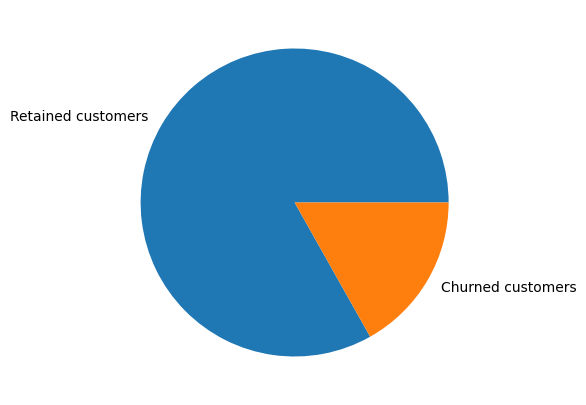

In [109]:
plt.figure(figsize=(5,5))
plt.pie(churn_rate, labels=['Retained customers','Churned customers'])
plt.show()

#### Let’s analyze some of the numerical columns

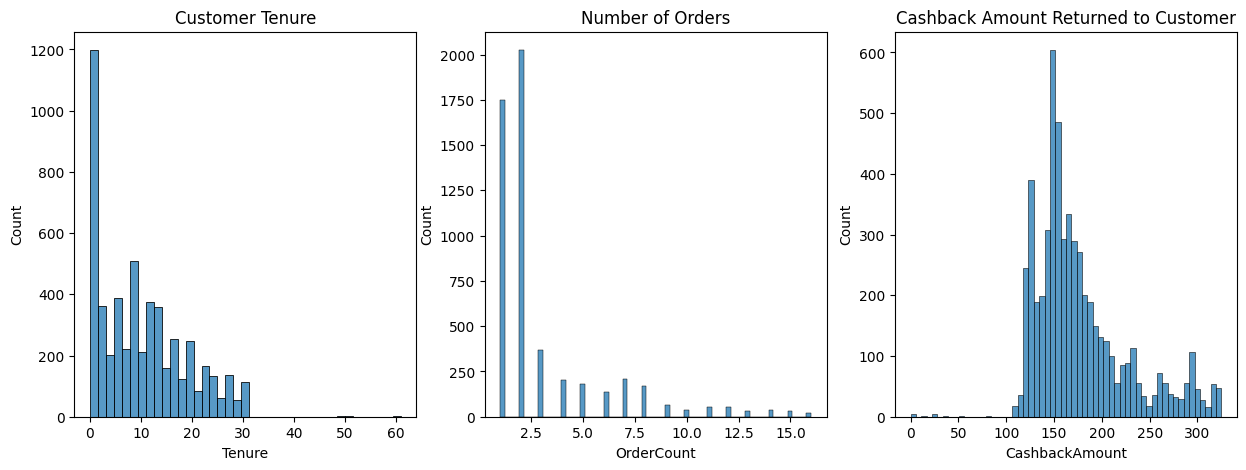

In [110]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

# Tenure
sns.histplot(x="Tenure", data=df, ax=axes[0])
axes[0].set_title("Customer Tenure")

# OrderCount
sns.histplot(x="OrderCount", data=df, ax=axes[1])
axes[1].set_title("Number of Orders")

# Cashback
sns.histplot(x="CashbackAmount", data=df, ax=axes[2])
axes[2].set_title("Cashback Amount Returned to Customer")

plt.show()

#### Let’s analyze the categorical columns.

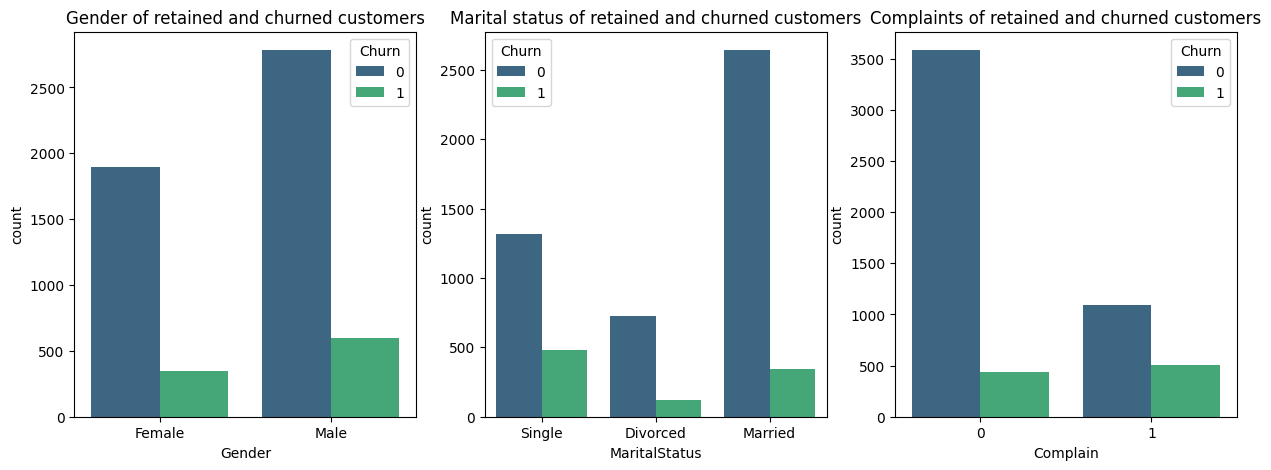

In [111]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.countplot(x='Gender', hue='Churn', palette='viridis', data=df, ax=axes[0])
axes[0].set_title("Gender of retained and churned customers")

sns.countplot(x='MaritalStatus', hue='Churn', palette='viridis', data=df, ax=axes[1])
axes[1].set_title("Marital status of retained and churned customers")

sns.countplot(x='Complain', hue='Churn', palette='viridis', data=df, ax=axes[2])
axes[2].set_title("Complaints of retained and churned customers")

plt.show()

In [112]:
df.corrwith(df['Churn'], numeric_only=True).abs().sort_values(ascending=False)

,0
Churn,1.000000
Tenure,0.349408
Complain,0.250188
DaySinceLastOrder,0.160757
CashbackAmount,0.154118
NumberOfDeviceRegistered,0.107939
SatisfactionScore,0.105481
CityTier,0.084703
WarehouseToHome,0.076630
NumberOfAddress,0.043931


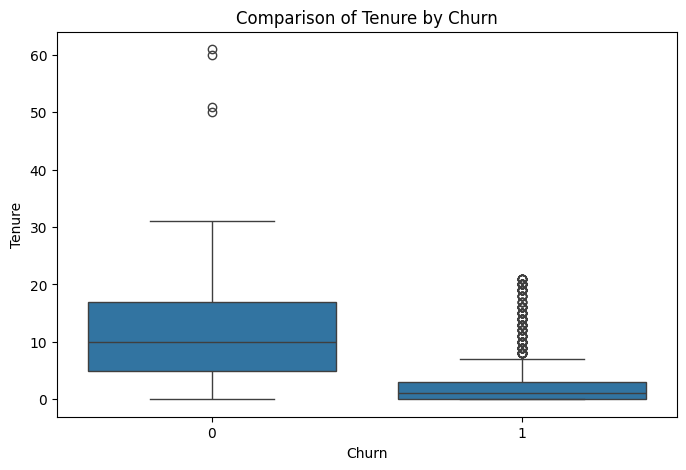

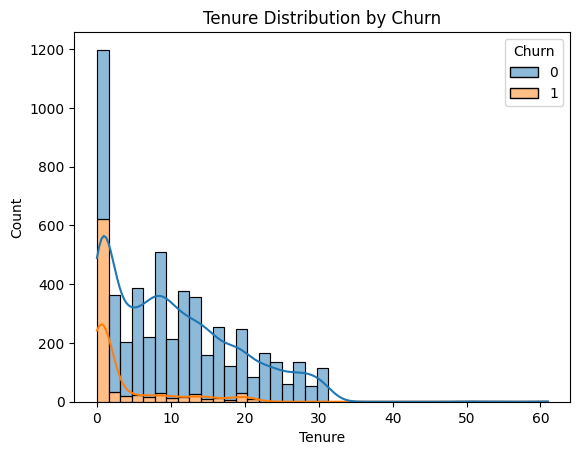

In [129]:
# 1. Visualization by Tenure
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='Tenure', data=df)
plt.title('Comparison of Tenure by Churn')
plt.show()

sns.histplot(data=df, x='Tenure', hue='Churn', kde=True, multiple="stack")
plt.title('Tenure Distribution by Churn')
plt.show()

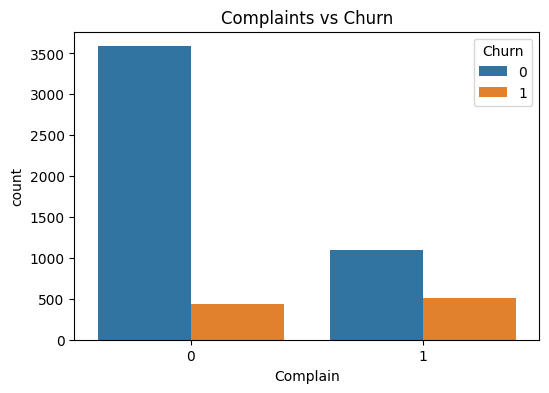

In [130]:
# 2. Visualization by Complain
plt.figure(figsize=(6,4))
sns.countplot(x='Complain', hue='Churn', data=df)
plt.title('Complaints vs Churn')
plt.show()


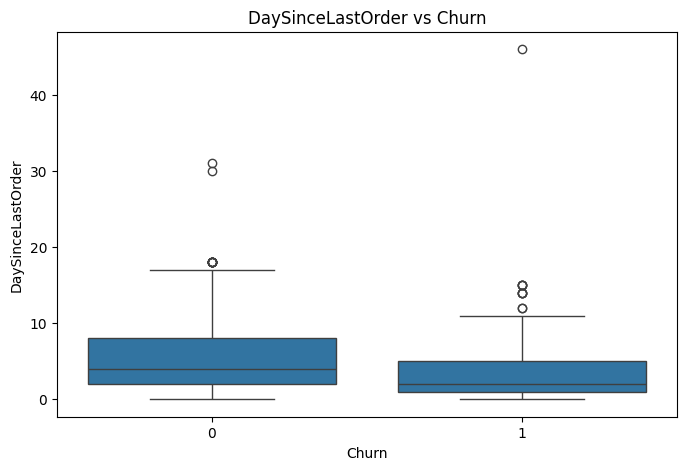

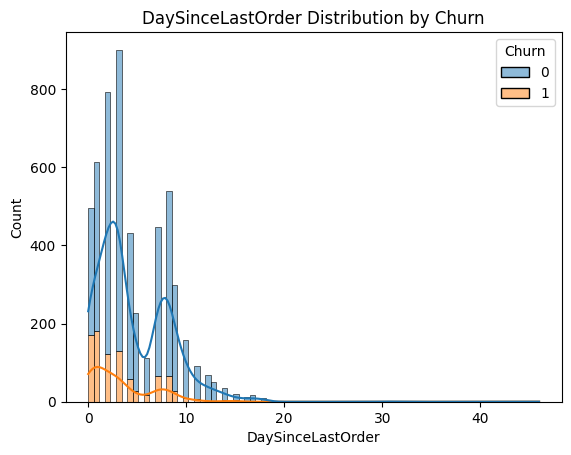

In [131]:
# 3. Visualization by DaySinceLastOrder
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='DaySinceLastOrder', data=df)
plt.title('DaySinceLastOrder vs Churn')
plt.show()

sns.histplot(data=df, x='DaySinceLastOrder', hue='Churn', kde=True, multiple="stack")
plt.title('DaySinceLastOrder Distribution by Churn')
plt.show()


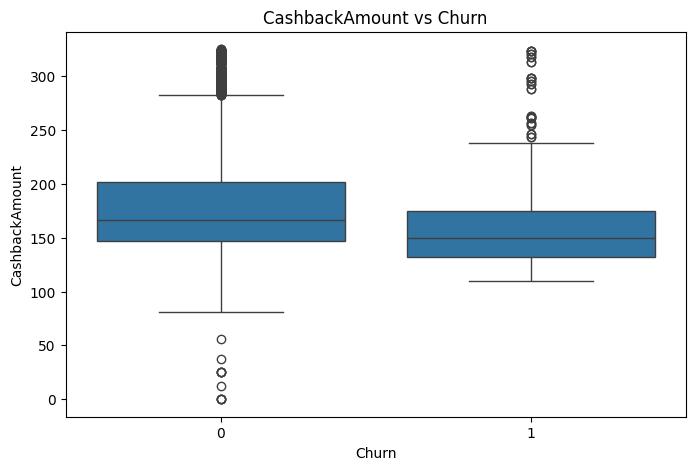

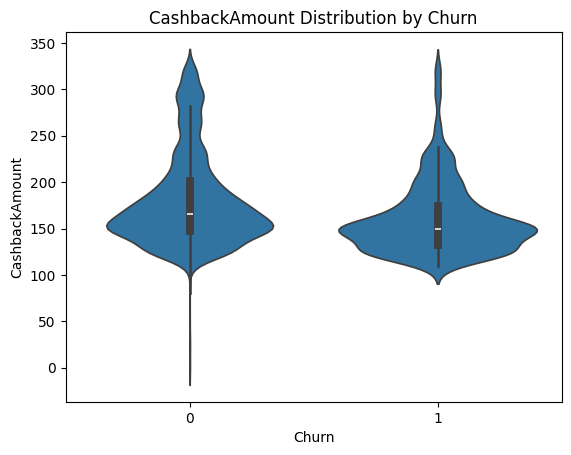

In [132]:
# 4. Visualization by CashbackAmount
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='CashbackAmount', data=df)
plt.title('CashbackAmount vs Churn')
plt.show()

sns.violinplot(x='Churn', y='CashbackAmount', data=df)
plt.title('CashbackAmount Distribution by Churn')
plt.show()


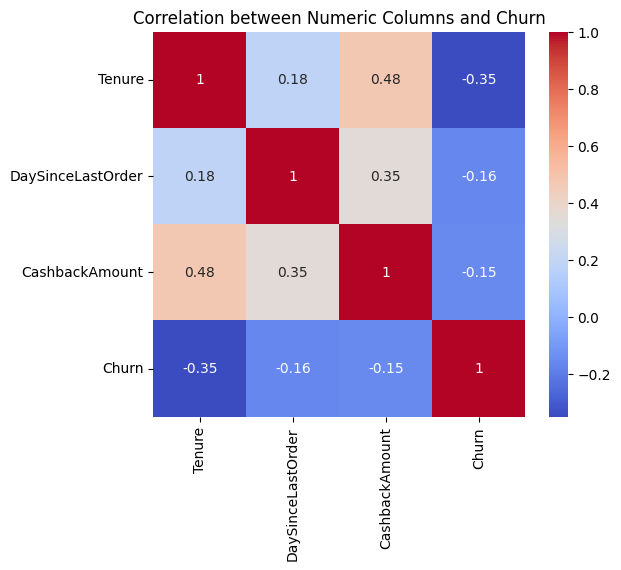

In [133]:
# 5. Correlation heatmap (numeric columns)
numeric_cols = ['Tenure', 'DaySinceLastOrder', 'CashbackAmount']
plt.figure(figsize=(6,5))
sns.heatmap(df[numeric_cols + ['Churn']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Numeric Columns and Churn')
plt.show()

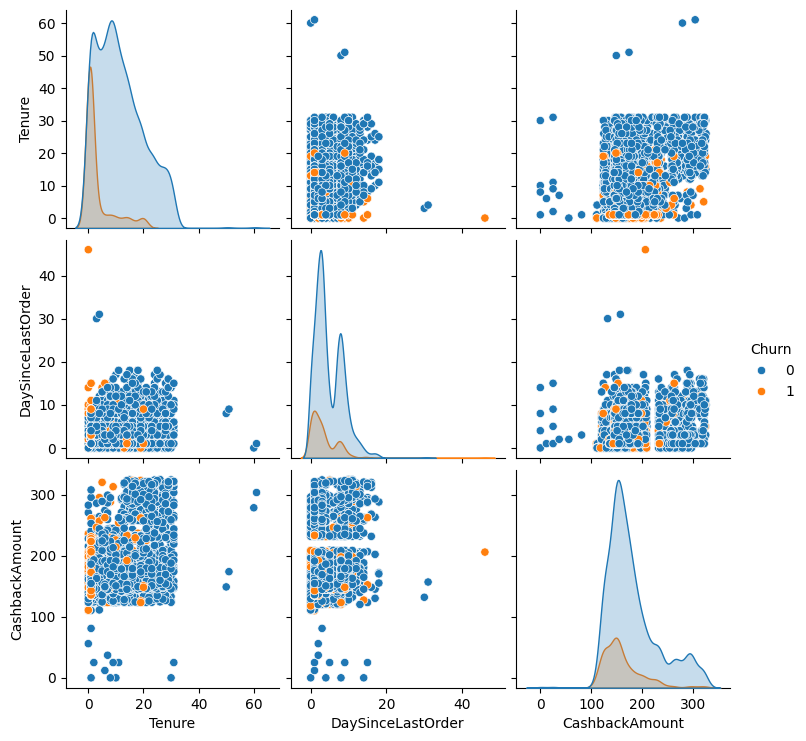

In [134]:
# 6. Pairplot for overall analysis
sns.pairplot(df, hue='Churn', vars=['Tenure', 'DaySinceLastOrder', 'CashbackAmount'])
plt.show()

## Data preprocessing

In [113]:
print(f"Number of missing values: {df.isnull().sum().sum()}")
missing_rows = df[df.isnull().any(axis=1)].shape[0]
print(f"Number of missing rows: {missing_rows}")
#qatorlar nisbati
print(f"Missing rows %: {np.round(missing_rows/len(df)*100)}%")

Number of missing values: 1856
Number of missing rows: 1856
Missing rows %: 33.0%


33% is quite a lot. But are we going to use all the columns?

Let’s select the columns with high correlation

In [114]:
data = df[['Churn','Tenure','Complain','DaySinceLastOrder','CashbackAmount','MaritalStatus','Gender']]

In [115]:
print(f"Number of missing values: {data.isnull().sum().sum()}")

missing_rows = data[data.isnull().any(axis=1)].shape[0]
print(f"Number of missing rows: {missing_rows}")
#qatorlar nisbati
print(f"Missing rows %: {np.round(missing_rows/len(data)*100)}%")

Number of missing values: 571
Number of missing rows: 571
Missing rows %: 10.0%


10% of the rows have missing values.

In [116]:
data = data.dropna()
data.shape

(5059, 7)

In [117]:
data['Churn'].value_counts()/len(data)

,count
Churn,
0,0.839296
1,0.160704


## Preparation for ML

In [118]:
# Convert text columns to numbers.
encoded = LabelEncoder()
data['MaritalStatus']  = encoded.fit_transform(data['MaritalStatus'])
data['Gender'] = encoded.fit_transform(data['Gender'])


In [119]:
X = data.drop("Churn", axis=1)
y = data['Churn']

In [120]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [121]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

## ML

### Logistic Regression

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       849
           1       0.71      0.37      0.48       163

    accuracy                           0.87      1012
   macro avg       0.80      0.67      0.71      1012
weighted avg       0.86      0.87      0.86      1012

Model accuracy: 0.8735177865612648


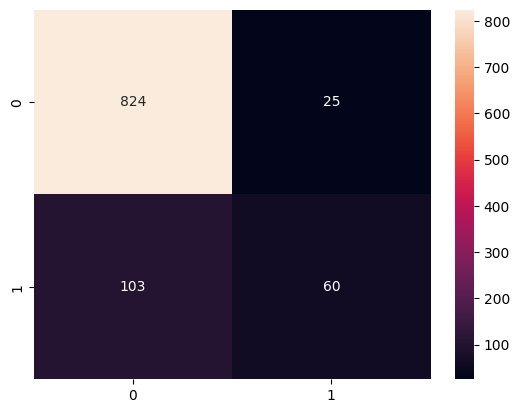

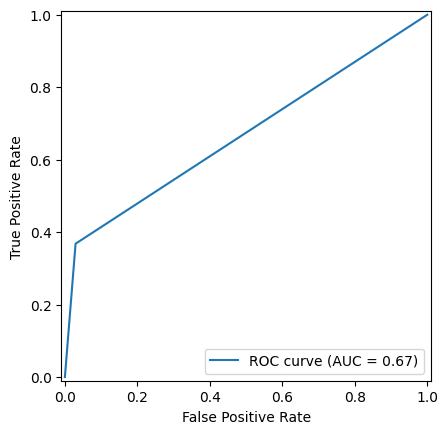

In [122]:
# Model training
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

# Model evaluation
y_pred = LR_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model accuracy:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

### Support Vector Machines

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       849
           1       0.70      0.37      0.48       163

    accuracy                           0.87      1012
   macro avg       0.79      0.67      0.70      1012
weighted avg       0.86      0.87      0.86      1012

Model accuracy: 0.8725296442687747
f1_score: 0.4819277108433735


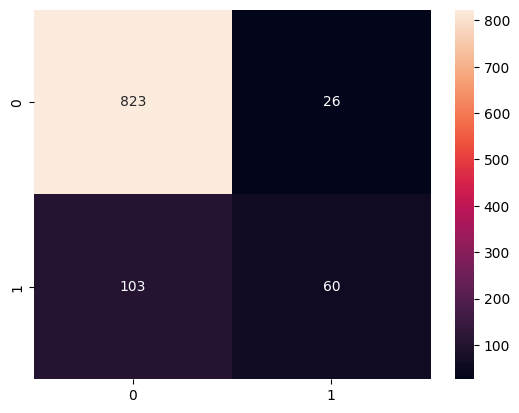

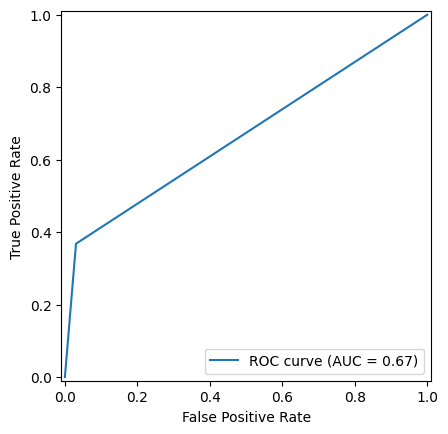

In [123]:
# Model training
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Model evaluation
y_pred = svm_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model accuracy:", metrics.accuracy_score(y_test,y_pred))
print("f1_score:", metrics.f1_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

### Decision Tree

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       849
           1       0.85      0.89      0.87       163

    accuracy                           0.96      1012
   macro avg       0.92      0.93      0.92      1012
weighted avg       0.96      0.96      0.96      1012

Model accuracy: 0.9575098814229249
f1_score: 0.8708708708708709


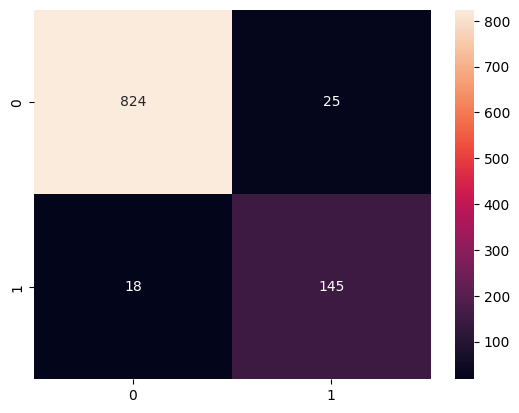

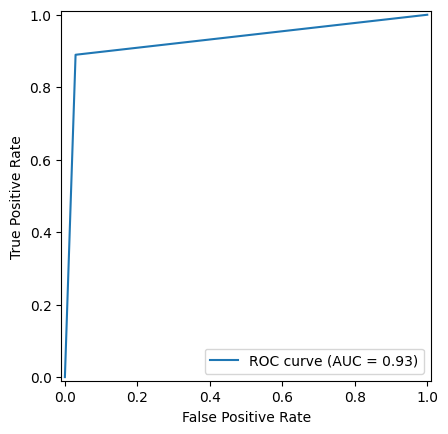

In [124]:
# Model training
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Modelni evaluation
y_pred = tree_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model accuracy:", metrics.accuracy_score(y_test,y_pred))
print("f1_score:", f1_score(y_test,y_pred))
## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

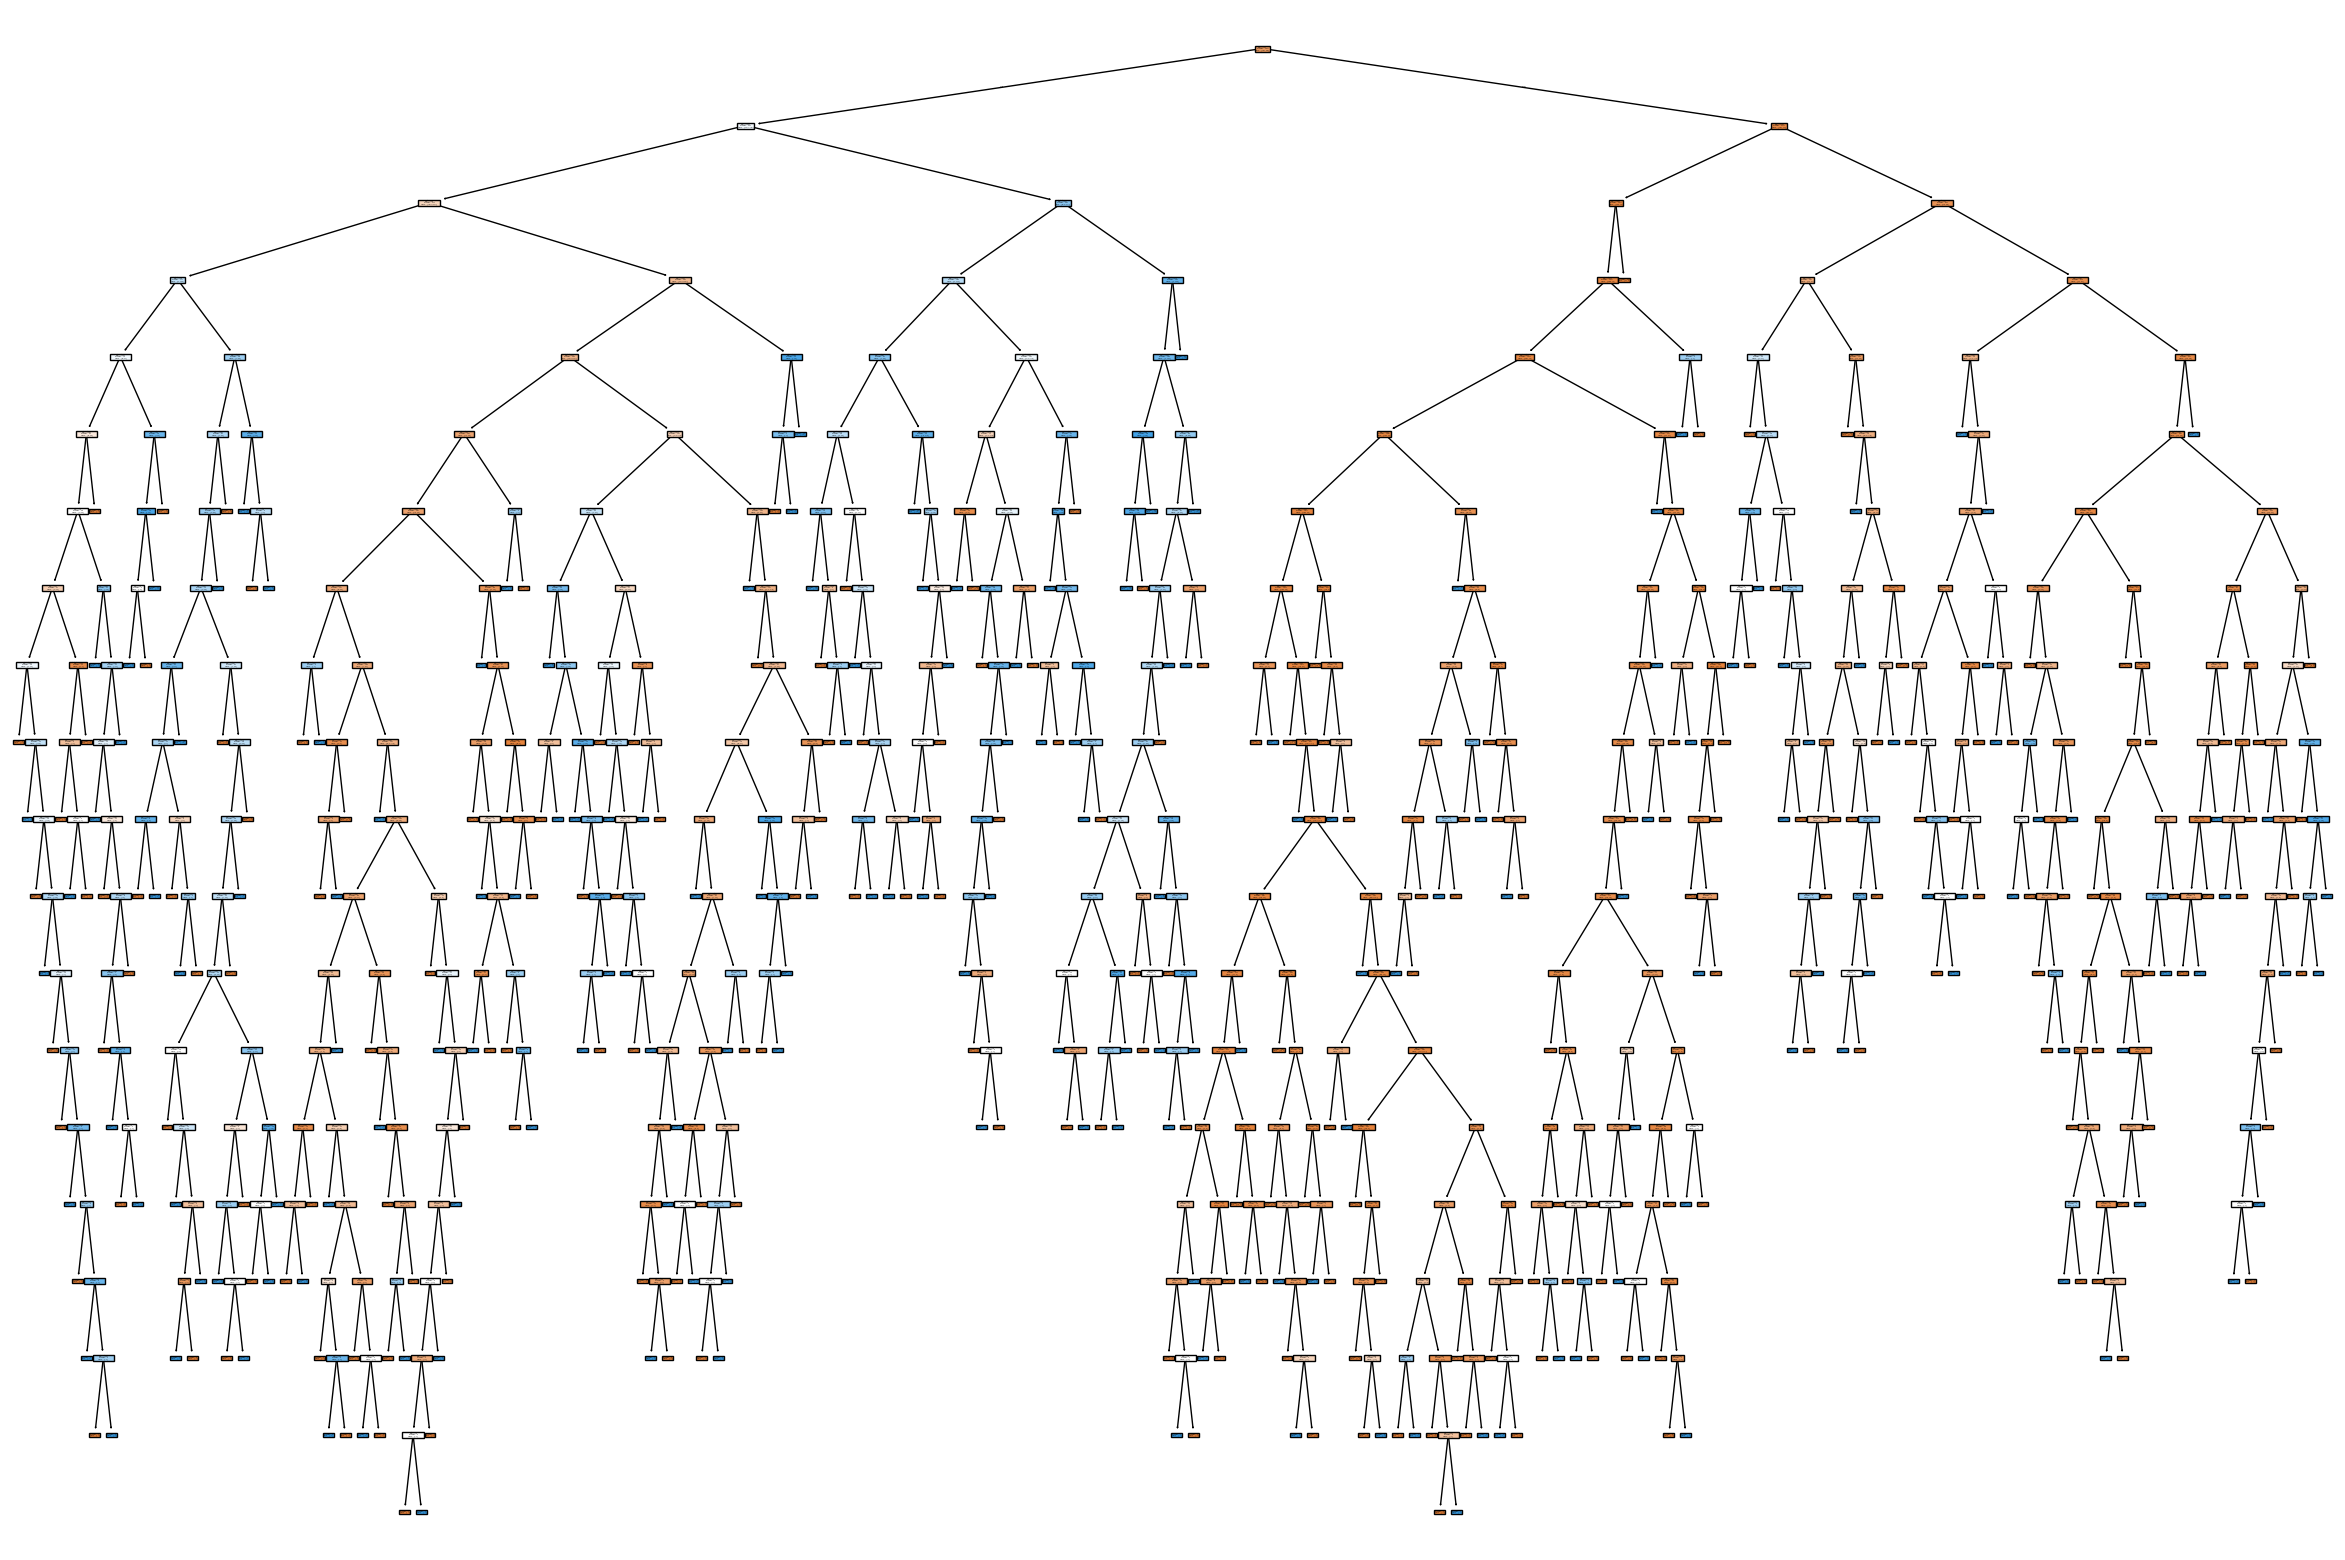

In [125]:
cols = data.drop('Churn', axis=1).columns

plt.figure(figsize=(30,20))
plot_tree(tree_model, feature_names=cols, filled=True)
plt.show()


DecisionTrees's Accuracy:  0.8942687747035574
f1_score: 0.610909090909091


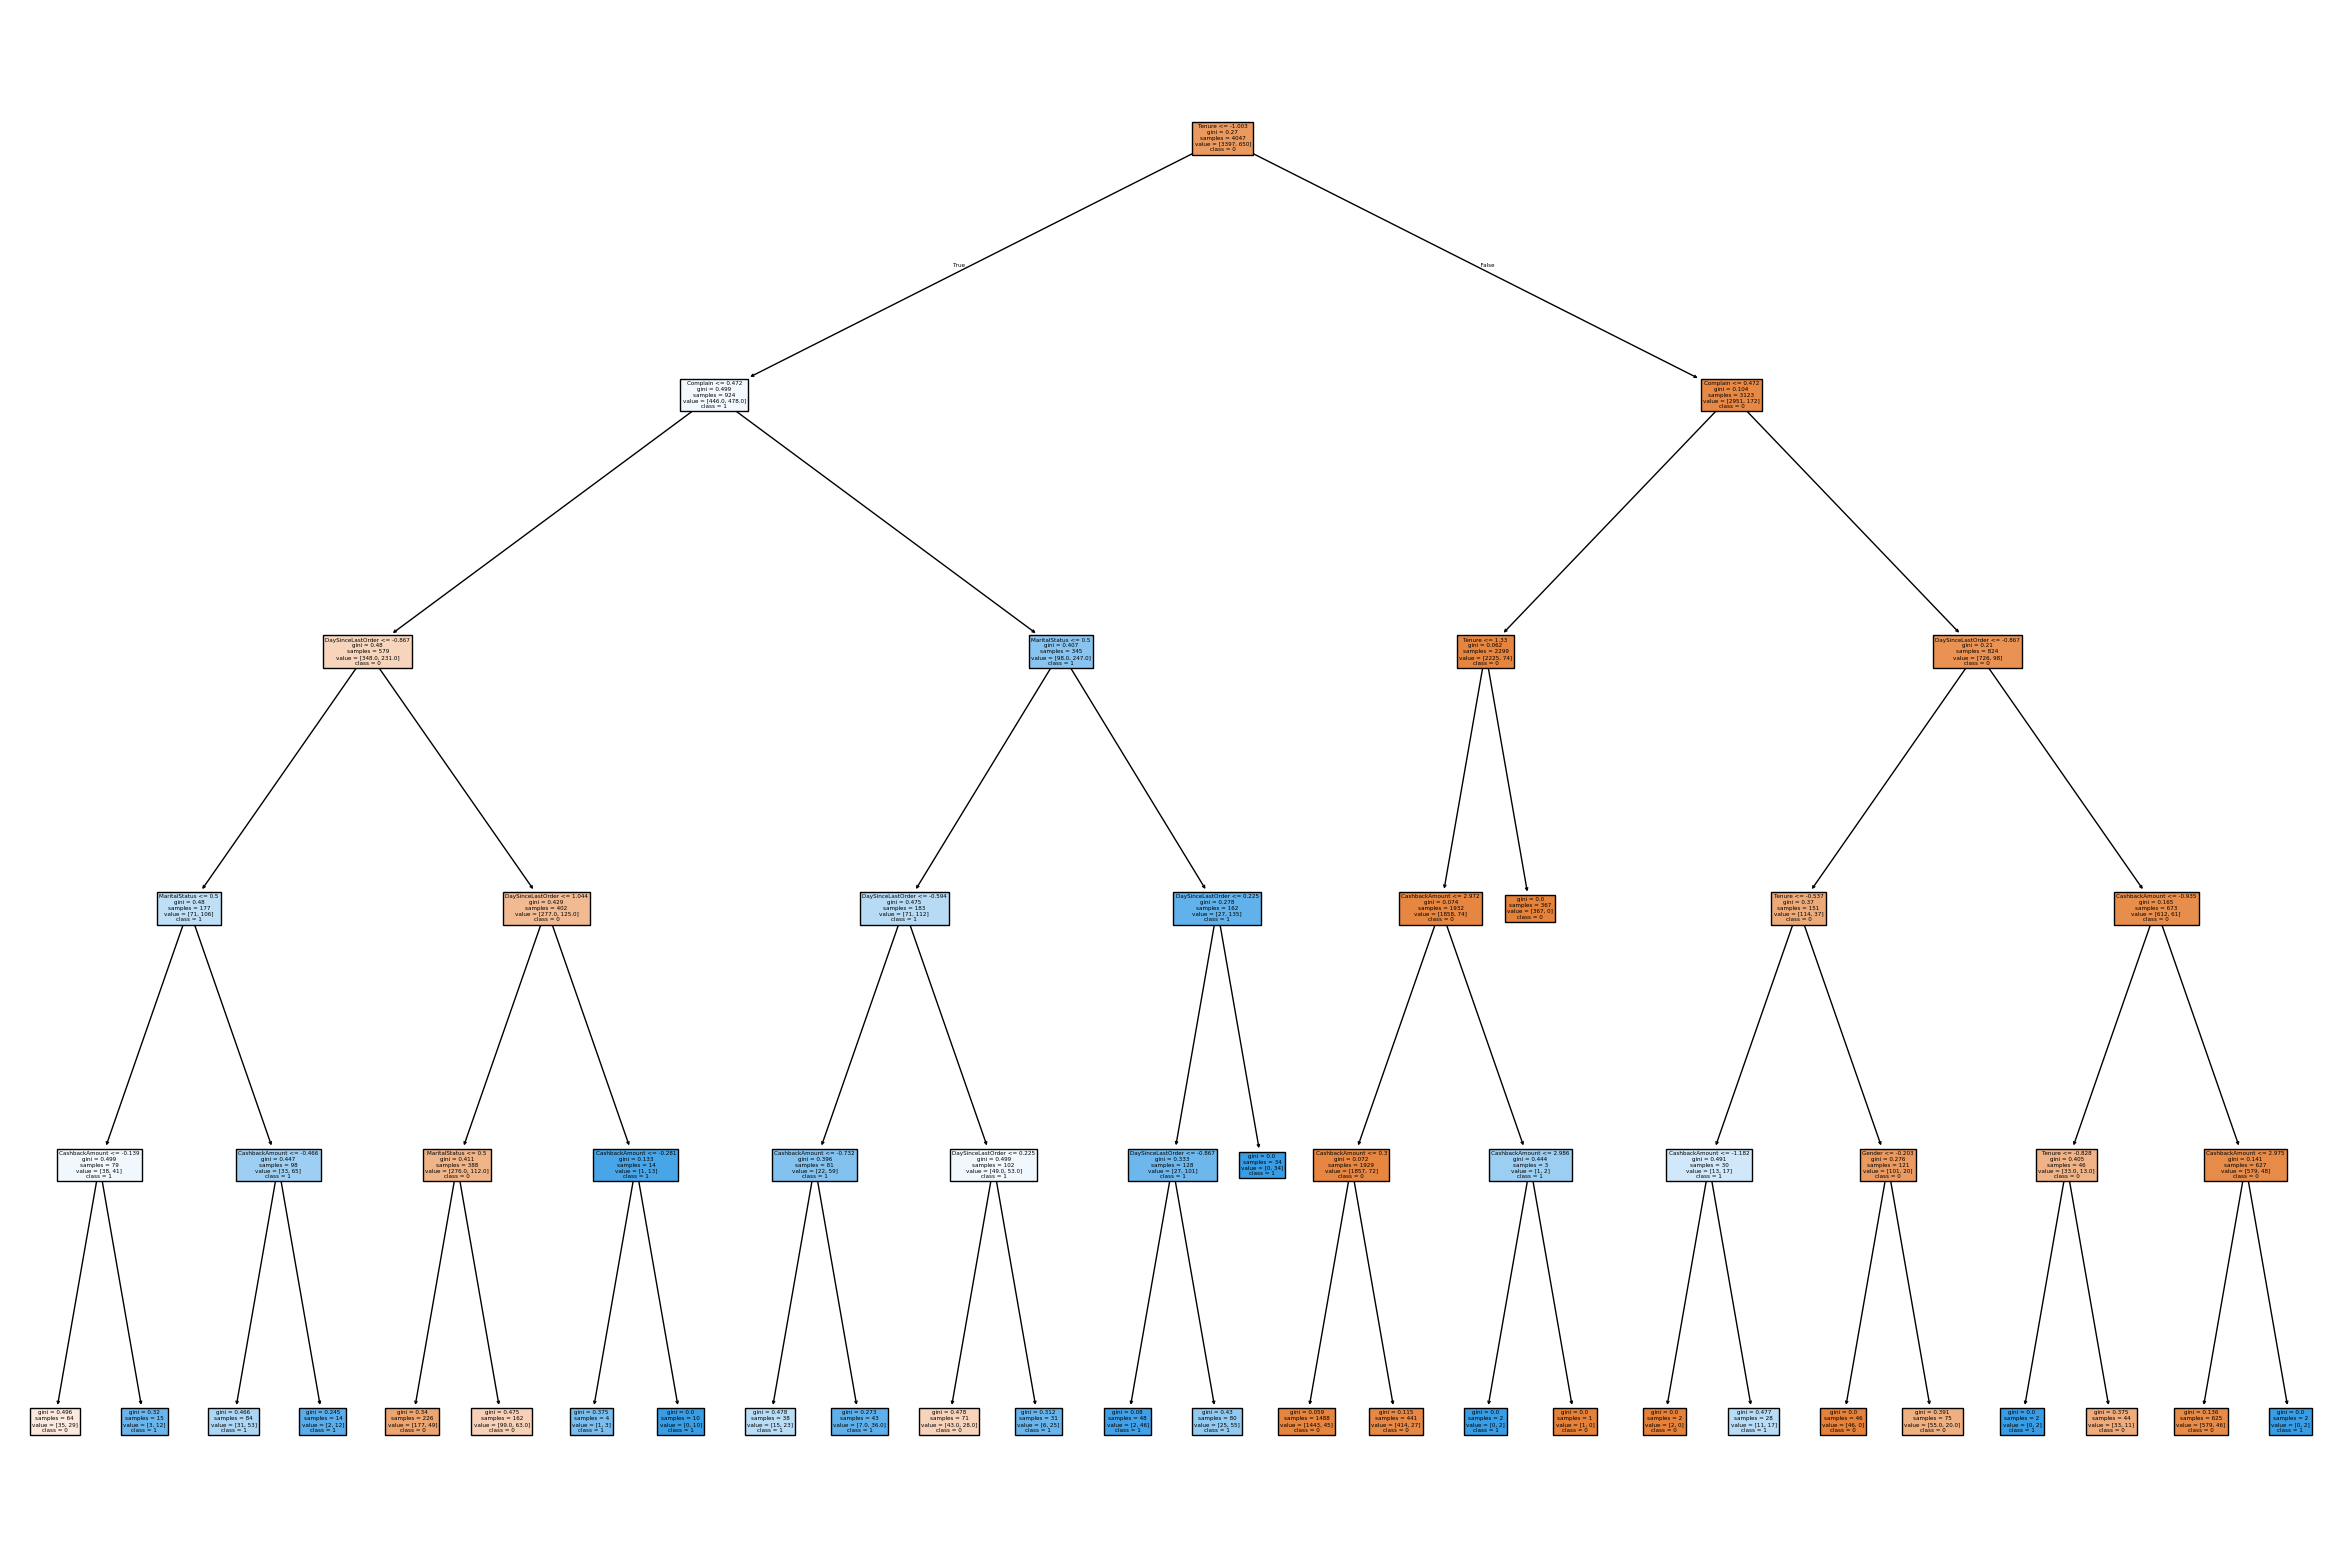

In [126]:
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn import tree

tree_model = DecisionTreeClassifier(min_impurity_decrease=0.0, max_depth=5)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_predict))
print("f1_score:",f1_score(y_test,y_predict))
plt.figure(figsize=(30,20))
classes = ['0', '1']
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

### Random Forest

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       849
           1       0.87      0.79      0.83       163

    accuracy                           0.95      1012
   macro avg       0.92      0.88      0.90      1012
weighted avg       0.95      0.95      0.95      1012

Model accuracy: 0.9466403162055336
f1_score: 0.8258064516129032


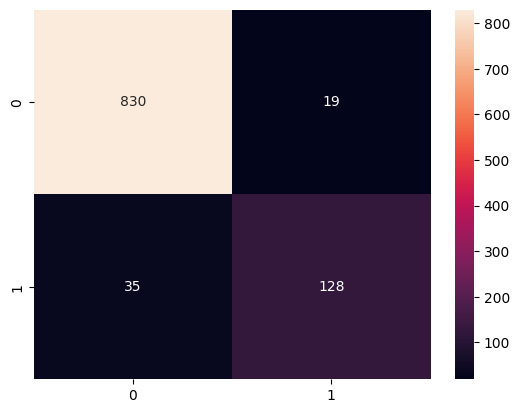

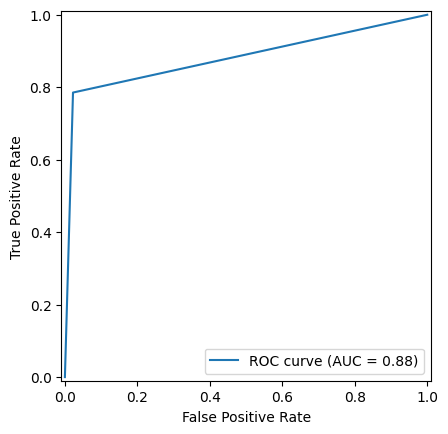

In [127]:
# Model training
RF_model = RandomForestClassifier(n_estimators=9)
RF_model.fit(X_train, y_train)

# Model evaluation
y_pred = RF_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model accuracy:", accuracy_score(y_test,y_pred))
print("f1_score:", f1_score(y_test,y_pred))
## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

### XGBoost

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       849
           1       0.86      0.77      0.81       163

    accuracy                           0.94      1012
   macro avg       0.91      0.87      0.89      1012
weighted avg       0.94      0.94      0.94      1012

Model accuracy: 0.941699604743083
F1 score: 0.8090614886731392


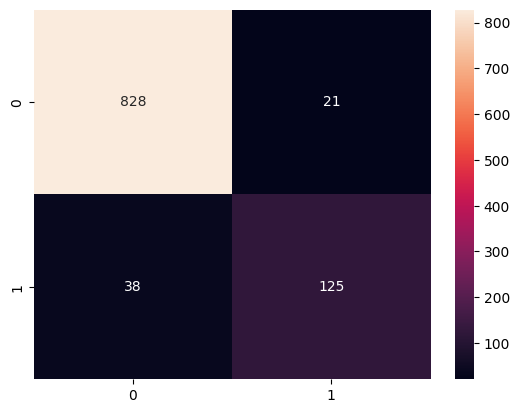

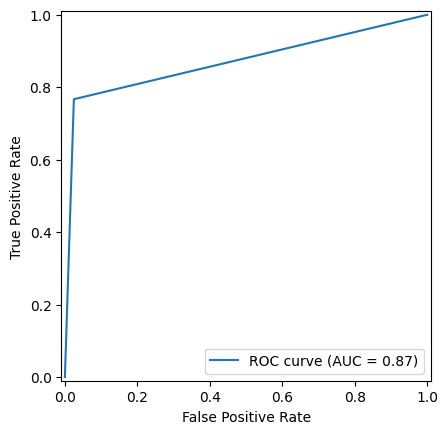

In [128]:
# Model training
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Model evaluation
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model accuracy:", accuracy_score(y_test,y_pred))
print("F1 score:", f1_score(y_test,y_pred))
## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

### CONCLUSION

Using a Decision Tree, the Recall (for those leaving) on the test set was 90%, and the F1-score was 87%, which is higher compared to other models and ROC curve is higher as well. Therefore, the Decision Tree was chosen as the primary model for the churn project.

In the project, 83% of customers will retain, indicating a high level of customer loyalty to the company or service. This, in turn, reflects a relatively low churn rate (17%)

From the analysis, I found that:

New customers and those who received less cashback are more likely to churn.

Customers who have stayed for a long time and received more cashback tend to remain loyal.

Customers who haven’t made an order for a long time have a higher risk of churn.

Therefore, to reduce churn, the company should:

Pay more attention to new customers,

Strengthen the cashback and bonus system,

Take actions that encourage customers to order more frequently.